In [2]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("./day08_digit recognizor.csv")
data.head()
X=data.iloc[:,1:]
Y=data.iloc[:,0]

In [4]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#对这么多的特征进行降维，但是由于n_components不知道，故可以画超参数曲线图
from sklearn.decomposition import PCA
pca=PCA().fit(data)

In [6]:
pca.explained_variance_ratio_

array([9.74892029e-02, 7.16030749e-02, 6.14588996e-02, 5.37929512e-02,
       4.89427671e-02, 4.30320476e-02, 3.27704281e-02, 2.89209709e-02,
       2.76689566e-02, 2.34886696e-02, 2.09932044e-02, 2.05899867e-02,
       1.70255574e-02, 1.69278312e-02, 1.58112488e-02, 1.48323620e-02,
       1.31968887e-02, 1.28272407e-02, 1.18797353e-02, 1.15275437e-02,
       1.07218888e-02, 1.01519689e-02, 9.64903231e-03, 9.12843864e-03,
       8.87638708e-03, 8.38765035e-03, 8.11855832e-03, 7.77404541e-03,
       7.40633767e-03, 6.86659898e-03, 6.57980660e-03, 6.38798274e-03,
       5.99365562e-03, 5.88912795e-03, 5.64333810e-03, 5.40965871e-03,
       5.09220927e-03, 4.87503804e-03, 4.75568268e-03, 4.66543591e-03,
       4.52951936e-03, 4.44988467e-03, 4.18254704e-03, 3.97505400e-03,
       3.84541301e-03, 3.74918568e-03, 3.61013271e-03, 3.48521422e-03,
       3.36487266e-03, 3.20737438e-03, 3.15466623e-03, 3.09144792e-03,
       2.93708481e-03, 2.86540726e-03, 2.80759156e-03, 2.69617986e-03,
      

In [7]:
np.cumsum(pca.explained_variance_ratio_)

array([0.0974892 , 0.16909228, 0.23055118, 0.28434413, 0.3332869 ,
       0.37631894, 0.40908937, 0.43801034, 0.4656793 , 0.48916797,
       0.51016117, 0.53075116, 0.54777672, 0.56470455, 0.5805158 ,
       0.59534816, 0.60854505, 0.62137229, 0.63325202, 0.64477957,
       0.65550146, 0.66565342, 0.67530246, 0.6844309 , 0.69330728,
       0.70169493, 0.70981349, 0.71758754, 0.72499387, 0.73186047,
       0.73844028, 0.74482826, 0.75082192, 0.75671105, 0.76235438,
       0.76776404, 0.77285625, 0.77773129, 0.78248697, 0.78715241,
       0.79168193, 0.79613181, 0.80031436, 0.80428941, 0.80813483,
       0.81188401, 0.81549415, 0.81897936, 0.82234423, 0.82555161,
       0.82870627, 0.83179772, 0.83473481, 0.83760021, 0.8404078 ,
       0.84310398, 0.84576229, 0.84832527, 0.85086348, 0.85332526,
       0.85572242, 0.85810981, 0.86038572, 0.8626009 , 0.86474023,
       0.86680156, 0.86883007, 0.87078983, 0.87272622, 0.87461106,
       0.87647857, 0.87829527, 0.88006419, 0.88179011, 0.88345

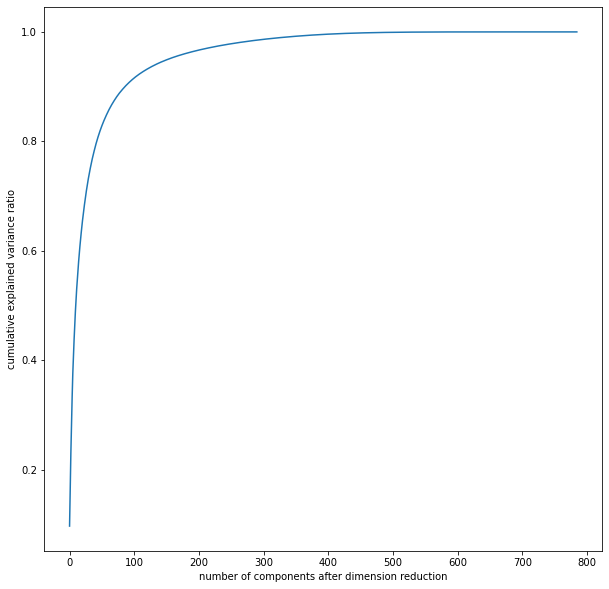

In [8]:
#讲所有信息的占比画出曲线图
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [ ]:
#通过超参数曲线来选择n_components

from sklearn.model_selection import cross_val_score
score=[]
for i in range(1,101,10):
    x_dr=PCA(i).fit_transform(X)
    once=cross_val_score(RandomForestClassifier(n_estimators=10,random_state=0),x_dr,Y,cv=5).mean()
    score.append(once)
plt.figure(figsize=(10,10))
plt.plot(range(1,101,10),score)
plt.show()

In [ ]:
score.index(max(score))*10+1

In [ ]:
#求得n_components=21
score=[]
for i in range(10,25):
    x_dr=PCA(i).fit_transform(X)
    once=cross_val_score(RandomForestClassifier(n_estimators=10,random_state=0),x_dr,Y,cv=5).mean()
    score.append(once)
plt.figure(figsize=(10,10))

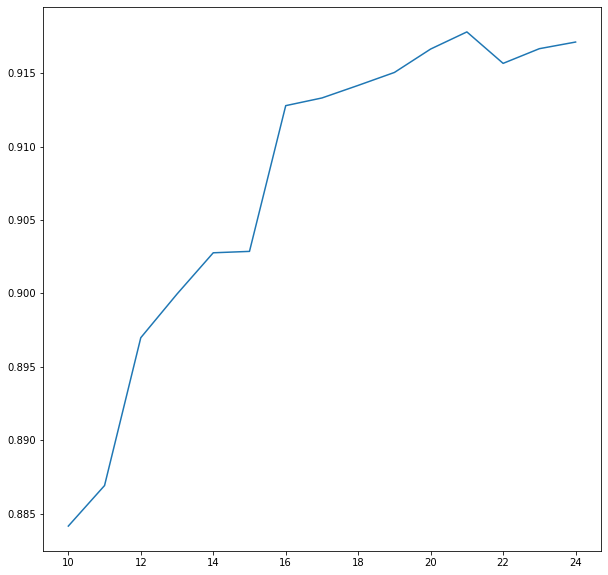

In [29]:
plt.figure(figsize=(10,10))
plt.plot(range(10,25),score)
plt.show()

In [32]:
10+score.index(max(score))

21

In [33]:
cross_val_score(RandomForestClassifier(n_estimators=100,random_state=0),x_dr,Y,cv=5).mean()

0.9471904761904761

In [34]:
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(),x_dr,Y,cv=5).mean()

0.9704285714285714